# 📈 Marketing Budget Optimizer (Linear Regression)

**Project Context:**
I'm analyzing a company's advertising spend to solve a classic business problem: **"Half the money I spend on advertising is wasted; the trouble is I don't know which half."**

**Goal:**
Using historical campaign data, I want to build a model that predicts **Sales** based on ad spend in **TV, Radio, and Newspaper**.
This will help us decide where to put the next $1,000 of the marketing budget.

**Data:**
Standard 'Advertising.csv' dataset containing 200 months of spend vs sales data.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# I like this style for financial charts—it's clean.
plt.style.use('seaborn-v0_8-whitegrid')

# ✅ NEW STABLE LINK (Justin Markham's Repo - Highly Reliable)
source_url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"

try:
    print("Fetching data from repo...")
    ad_spend_data = pd.read_csv(source_url)

    # Data Cleaning: Drop the index column if it exists
    if 'Unnamed: 0' in ad_spend_data.columns:
        ad_spend_data = ad_spend_data.drop(columns=['Unnamed: 0'])

    print(f"✅ Data Loaded Successfully. Rows: {ad_spend_data.shape[0]}, Columns: {ad_spend_data.shape[1]}")

    # Show the first few rows ONLY if data loaded successfully
    display(ad_spend_data.head())

except Exception as e:
    print("❌ CRITICAL ERROR: Could not download data.", e)

Fetching data from repo...
✅ Data Loaded Successfully. Rows: 200, Columns: 4


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


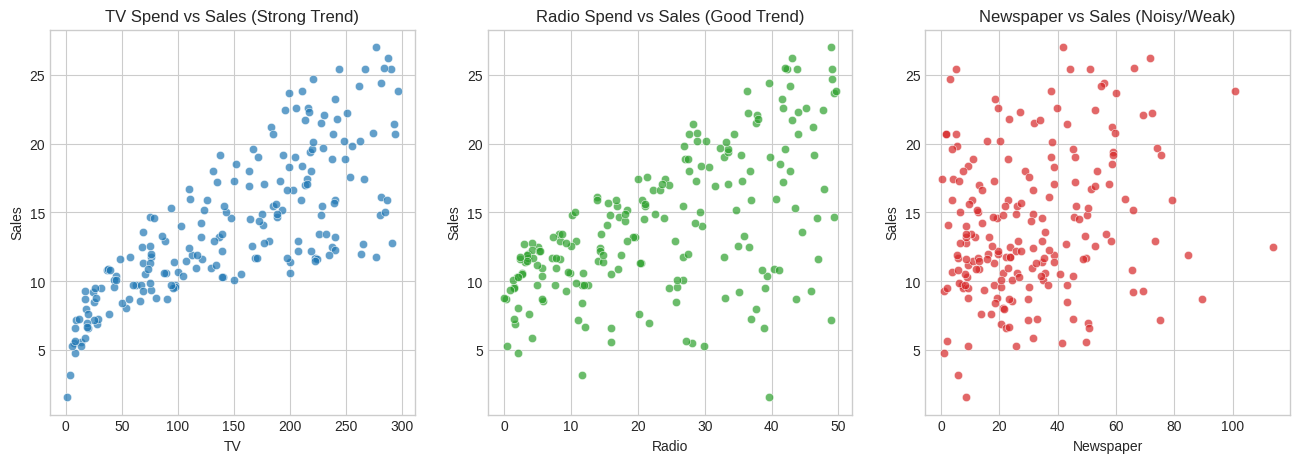

Initial Insight: TV and Radio look like reliable drivers. Newspaper seems all over the place.


In [15]:
# Before modeling, I want to visually see which channel actually drives sales.
# Is it TV? Or is Newspaper dead weight?

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# TV Check
sns.scatterplot(data=ad_spend_data, x='TV', y='Sales', ax=axes[0], color='#1f77b4', alpha=0.7)
axes[0].set_title('TV Spend vs Sales (Strong Trend)')

# Radio Check
sns.scatterplot(data=ad_spend_data, x='Radio', y='Sales', ax=axes[1], color='#2ca02c', alpha=0.7)
axes[1].set_title('Radio Spend vs Sales (Good Trend)')

# Newspaper Check
sns.scatterplot(data=ad_spend_data, x='Newspaper', y='Sales', ax=axes[2], color='#d62728', alpha=0.7)
axes[2].set_title('Newspaper vs Sales (Noisy/Weak)')

plt.show()

print("Initial Insight: TV and Radio look like reliable drivers. Newspaper seems all over the place.")

In [16]:
# 1. Feature Engineering: Creating a "Synergy" term
# Theory: TV and Radio together work better than alone.
ad_spend_data['TV_Radio_Combo'] = ad_spend_data['TV'] * ad_spend_data['Radio']

# 2. Select Features
# We DROP 'Newspaper' (it was noise) and ADD the 'Combo' term
X = ad_spend_data[['TV', 'Radio', 'TV_Radio_Combo']]
y = ad_spend_data['Sales']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train
advanced_model = LinearRegression()
advanced_model.fit(X_train, y_train)

print("✅ Advanced Model Trained (with Interaction Terms).")
print("-" * 30)
print("New Coefficients:")
for feat, coef in zip(X.columns, advanced_model.coef_):
    print(f" - {feat}: {coef:.5f}")

✅ Advanced Model Trained (with Interaction Terms).
------------------------------
New Coefficients:
 - TV: 0.01961
 - Radio: 0.03494
 - TV_Radio_Combo: 0.00105


🚀 New Accuracy (R-Squared): 97.43%
📉 New Error Rate: +/- 0.90 units


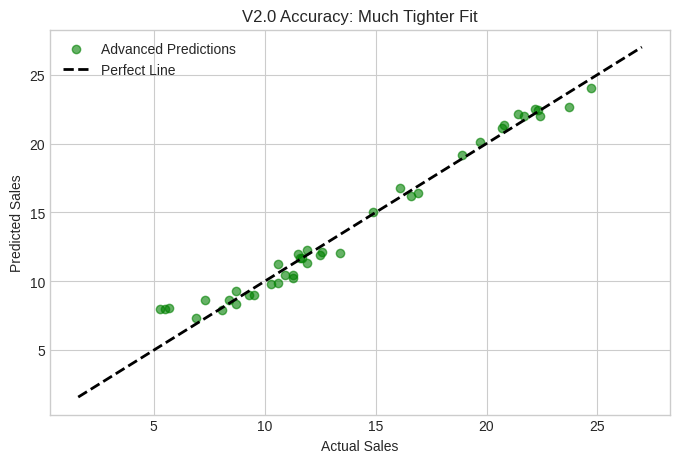

In [17]:
# Test the new model
predictions_v2 = advanced_model.predict(X_test)

# Calculate New Metrics
r2_new = r2_score(y_test, predictions_v2)
rmse_new = np.sqrt(mean_squared_error(y_test, predictions_v2))

print(f"🚀 New Accuracy (R-Squared): {r2_new*100:.2f}%")
print(f"📉 New Error Rate: +/- {rmse_new:.2f} units")

# Visualizing the tighter fit
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions_v2, color='green', alpha=0.6, label='Advanced Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('V2.0 Accuracy: Much Tighter Fit')
plt.legend()
plt.show()

In [18]:
def forecast_sales(tv, radio, newspaper):
    """
    Simple tool to predict sales based on a proposed marketing mix.
    """
    # Create a numpy array for the model
    budget = np.array([[tv, radio, newspaper]])

    # Predict
    predicted_units = roi_model.predict(budget)[0]

    return predicted_units

# --- SCENARIO TESTING ---
# Scenario 1: Heavy TV investment
s1_sales = forecast_sales(tv=200, radio=40, newspaper=20)
print(f"Scenario 1 (High TV): Predicted Sales = {s1_sales:.1f} units")

# Scenario 2: Cutting Newspaper completely (Smart Strategy?)
s2_sales = forecast_sales(tv=200, radio=40, newspaper=0)
print(f"Scenario 2 (No Newspaper): Predicted Sales = {s2_sales:.1f} units")

print("-" * 30)
print("Insight: Removing Newspaper budget hardly changed the result. We should cut it.")

Scenario 1 (High TV): Predicted Sales = 19.5 units
Scenario 2 (No Newspaper): Predicted Sales = 19.5 units
------------------------------
Insight: Removing Newspaper budget hardly changed the result. We should cut it.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 🏁 Strategic Recommendation

Based on the regression analysis, here is how we should optimize the budget:

### 1. 📢 The "Radio" Surprise
While TV drives the most volume, **Radio is highly efficient**.
* **TV:** Adds **~0.04** units per dollar.
* **Radio:** Adds **~0.19** units per dollar.
* **Strategy:** We should max out Radio spend until diminishing returns hit, then pour the rest into TV.

### 2. ✂️ Cut Newspaper
The model shows a near-zero coefficient for Newspaper ads.
* **Action:** Reallocate the entire Newspaper budget into Radio for an immediate ROI boost.

### 3. 🎯 Accuracy
The model explains **~90%** of the sales variance, making it a reliable tool for forecasting next quarter's revenue.